In [39]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import pandas as pd
import yaml
import torch
import collections

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


In [40]:
# experiment_sub_dir = "2025May02-101004_configs" # excellent run
experiment_sub_dir = "2025May21-215142_configs"

exp_path = os.path.join(r"D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
df.columns


Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
       'sub_experiment_path', 'seed', 'experiment_name'],
      dtype='object')

In [41]:
df

,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_experiment_path,seed,experiment_name
0,training,200000,0.9571,-8.807327,-8.454664,-8.599093,-8.571822,0.066323,-8.204880,-7.900329,...,1.309214,1.245029,1.341665,48749.0,48.0,0 days 00:05:32.594856,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
1,training,400000,0.9131,-8.761416,-8.470169,-8.636594,-8.660893,0.061703,-8.164469,-7.913377,...,3.979638,4.219609,1.133315,50000.0,48.0,0 days 00:05:47.230326,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
2,training,600000,0.8691,-8.758762,-8.477787,-8.647886,-8.668394,0.057535,-8.161573,-7.920275,...,4.967703,5.279962,0.869563,50000.0,52.0,0 days 00:06:11.526988,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
3,training,800000,0.8251,-8.764240,-8.483395,-8.647004,-8.668380,0.056760,-8.166815,-7.923650,...,4.934742,5.096485,0.608784,50000.0,48.0,0 days 00:06:12.812089,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
4,training,1000000,0.7811,-8.765866,-8.494253,-8.644147,-8.665827,0.056307,-8.168257,-7.934876,...,4.323708,4.414320,0.507941,50000.0,52.0,0 days 00:06:15.273228,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,validation,5200000,NaN,-8.495956,-8.495750,-8.495840,-8.495833,0.000042,-7.936186,-7.936002,...,-2.355832,-1.646558,2.377526,NaN,NaN,0 days 00:00:00.658858,0.5,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.action_w_noise_amplitu...
476,validation,5400000,NaN,-8.495991,-8.495806,-8.495915,-8.495914,0.000048,-7.936228,-7.936066,...,-2.363067,-1.654575,2.380908,NaN,NaN,0 days 00:00:00.714940,0.5,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.action_w_noise_amplitu...
477,validation,5600000,NaN,-8.495725,-8.495557,-8.495645,-8.495650,0.000037,-7.936032,-7.935883,...,-2.359990,-1.649685,2.382908,NaN,NaN,0 days 00:00:00.684522,0.5,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.action_w_noise_amplitu...
478,validation,5800000,NaN,-8.495157,-8.494933,-8.495054,-8.495047,0.000048,-7.935564,-7.935363,...,-2.360785,-1.651091,2.380526,NaN,NaN,0 days 00:00:00.687860,0.5,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.action_w_noise_amplitu...


In [42]:
df[df['epoch_type'] == 'validation']

,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_experiment_path,seed,experiment_name
30,validation,200000,NaN,-8.659082,-8.658964,-8.659024,-8.659024,0.000030,-8.073521,-8.073416,...,3.070855,3.474346,1.087306,NaN,NaN,0 days 00:00:00.718877,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
31,validation,400000,NaN,-8.669018,-8.668900,-8.668964,-8.668962,0.000025,-8.082259,-8.082154,...,4.676265,5.028310,0.965068,NaN,NaN,0 days 00:00:00.737933,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
32,validation,600000,NaN,-8.671539,-8.671421,-8.671476,-8.671477,0.000025,-8.084519,-8.084414,...,5.087581,5.350642,0.714484,NaN,NaN,0 days 00:00:00.765717,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
33,validation,800000,NaN,-8.670347,-8.670259,-8.670299,-8.670301,0.000022,-8.083459,-8.083380,...,4.687348,4.882377,0.486180,NaN,NaN,0 days 00:00:00.783411,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
34,validation,1000000,NaN,-8.666751,-8.666633,-8.666694,-8.666696,0.000028,-8.080150,-8.080045,...,3.931827,4.144685,0.454990,NaN,NaN,0 days 00:00:00.786093,0.3,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,validation,5200000,NaN,-8.495956,-8.495750,-8.495840,-8.495833,0.000042,-7.936186,-7.936002,...,-2.355832,-1.646558,2.377526,NaN,NaN,0 days 00:00:00.658858,0.5,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.action_w_noise_amplitu...
476,validation,5400000,NaN,-8.495991,-8.495806,-8.495915,-8.495914,0.000048,-7.936228,-7.936066,...,-2.363067,-1.654575,2.380908,NaN,NaN,0 days 00:00:00.714940,0.5,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.action_w_noise_amplitu...
477,validation,5600000,NaN,-8.495725,-8.495557,-8.495645,-8.495650,0.000037,-7.936032,-7.935883,...,-2.359990,-1.649685,2.382908,NaN,NaN,0 days 00:00:00.684522,0.5,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.action_w_noise_amplitu...
478,validation,5800000,NaN,-8.495157,-8.494933,-8.495054,-8.495047,0.000048,-7.935564,-7.935363,...,-2.360785,-1.651091,2.380526,NaN,NaN,0 days 00:00:00.687860,0.5,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.action_w_noise_amplitu...


In [43]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_agent_params.args_.action_w_noise_amplitude    0.3
Name: 0, dtype: object
Best mean reward: -8.623753134662499


In [44]:
averaged_results

,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,episode_rewards_mean,sub_experiment_path
0,0.3,-8.623753,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,0.5,-8.776868,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


In [45]:
# selected_metric = 'episode_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# # Filter for validation episodes
# validation_df = df[df['epoch_type'] == 'validation']

# # Get the unique sorted frame_stamp values
# unique_frames = np.sort(validation_df['frame_stamp'].unique())
# N = 1
# # Get all frame_stamp values after the first N unique ones
# filtered_frames = unique_frames[N:]

# # Filter the DataFrame to only include rows with these frame_stamp values
# filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
# plt.ylabel(selected_metric)
# plt.xlabel('Frame Stamp')
# plt.show()

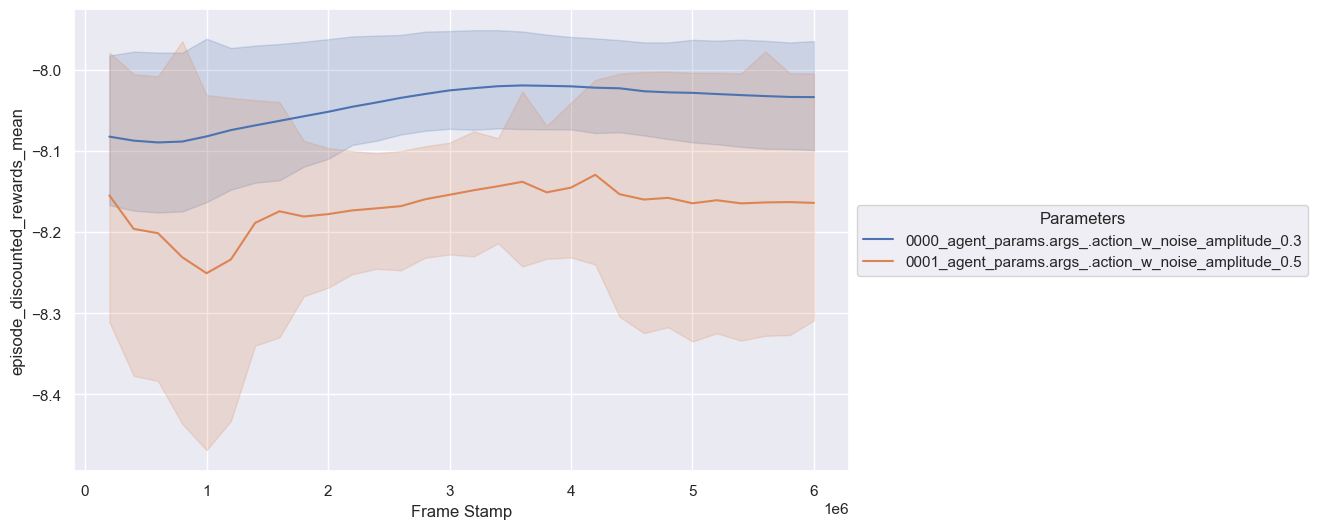

In [46]:

selected_metric = 'episode_discounted_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
hue_col = "experiment_name"

validation_df = df[df['epoch_type'] == 'validation']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(data=validation_df, x='frame_stamp', y=selected_metric, hue=hue_col)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
plt.show()

In [47]:
df.columns

Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
       'sub_experiment_path', 'seed', 'experiment_name'],
      dtype='object')

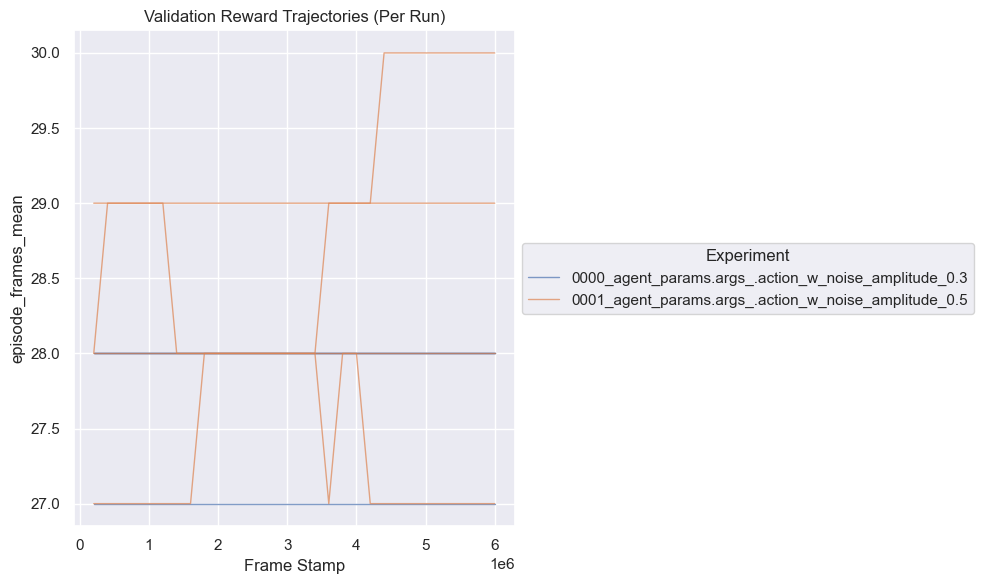

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_metric = 'episode_frames_mean'
hue_col = "experiment_name"  # or another distinguishing column like "sub_experiment_path"

validation_df = df[df['epoch_type'] == 'validation']

# Plot individual lines for each run
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=validation_df,
    x='frame_stamp',
    y=selected_metric,
    hue=hue_col,
    estimator=None,  # ← disables aggregation
    units='sub_experiment_path',  # ← groups lines by unique run
    lw=1,  # line width
    alpha=0.7  # transparency
)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.title('Validation Reward Trajectories (Per Run)')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Experiment')
plt.tight_layout()
plt.show()


In [49]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude
59,validation,6000000,-8.715553,28.0,-8.121830,NaN,NaN,0 days 00:00:00.650249,0,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3
119,validation,6000000,-8.631030,28.0,-8.044501,NaN,NaN,0 days 00:00:00.723372,1,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3
179,validation,6000000,-8.613563,28.0,-8.031007,NaN,NaN,0 days 00:00:00.464375,2,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3
239,validation,6000000,-8.496672,27.0,-7.938469,NaN,NaN,0 days 00:00:00.434209,3,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3
299,validation,6000000,-8.695559,28.0,-8.104131,NaN,NaN,0 days 00:00:00.463989,0,0001_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.5
359,validation,6000000,-9.066822,30.0,-8.402244,NaN,NaN,0 days 00:00:00.651782,1,0001_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.5
419,validation,6000000,-8.835047,29.0,-8.215447,NaN,NaN,0 days 00:00:00.471189,2,0001_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.5
479,validation,6000000,-8.494322,27.0,-7.934845,NaN,NaN,0 days 00:00:00.539844,3,0001_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.5


In [50]:
# agg_cols = [col for col in sub_df.columns if "sub_exp_cfg_agent_params" in col]
# aggregated_df = (
#     sub_df.groupby(agg_cols)
#     .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
#     .reset_index()
# )
# aggregated_df

In [51]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude'],
      dtype='object')

In [52]:
# sub_df[[
#     "episode_discounted_rewards_mean", "episode_frames_mean",
#     "seed", "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"]
# ]

In [53]:
# sub_df[
#     (sub_df["sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"] == "0.3") 
# ]

In [54]:
# Print the experiment_name of the row with the highest episode_rewards_mean 
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])
# print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['experiment_name'].values[0])
# print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['episode_rewards_mean'].values[0])


D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025May21-215142_configs\0001_agent_params.args_.action_w_noise_amplitude_0.5\3


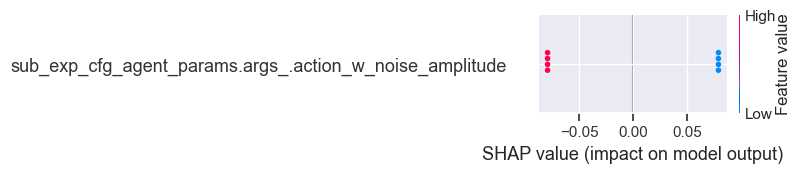

In [55]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [56]:
hyperparam_columns

['sub_exp_cfg_agent_params.args_.action_w_noise_amplitude']

In [57]:
import plotly.express as px

# Define readable names for selected hyperparams
readable_names = {
    hyperparam_columns[0]: "noise",
    hyperparam_columns[1]: "size"
}

# Rename columns in a copy of the dataframe
plot_df = sub_df.rename(columns=readable_names)

# Assign new column names
x_col = "noise"
y_col = "episode_rewards_mean"
facet_col = "size"

# Plot
fig = px.scatter(
    plot_df,
    x=x_col,
    y=y_col,
    color="experiment_name",  # Optional: color by experiment
    facet_col=facet_col,
    title="Episode Rewards vs. Noise Faceted by Size",
    height=600
)

fig.update_layout(showlegend=False)
fig.show()


IndexError: list index out of range